<b>Dependencies:</b> <br>
    %matplotlib inline <br>
    import pandas as pd <br>
    import numpy as np <br>
    import matplotlib.pyplot as plt <br>
    import seaborn as sns <br>



In [22]:
# DATASET DIMENSIONS

import pandas as pd

diabetes = pd.read_csv('../datasets/diabetes.csv')
print("Dataset dimensions: {}".format(diabetes.shape))



Dataset dimensions: (768, 9)


Outcome
0    500
1    268
dtype: int64


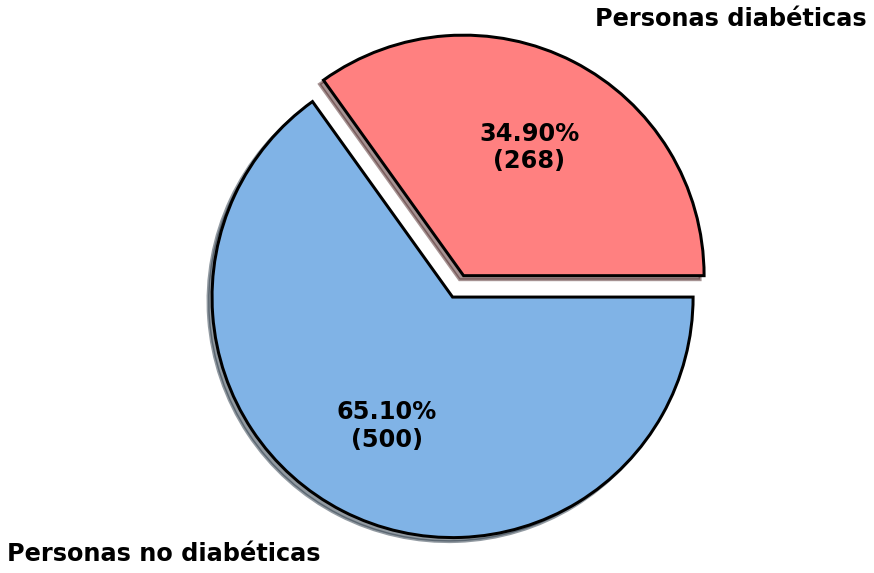

In [5]:
# OUTCOME ANALYSIS

# Graphs appearing in the notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def autocpt_content(pct, values):
    """ Modifies autocpt label so that the graph plots the percentage
    and the value of each region

        :param pct: List of the percentages values
        :param values: List of the absolute values
        :return: autocpt label formatted
    """

    # Values order might be different than percentage order so it must be computed
    absolute = int(pct / 100.*np.sum(values))
    return "{:.2f}%\n({:d})".format(pct, absolute)


diabetes = pd.read_csv('../datasets/diabetes.csv')
# Possible values: 0 (Non-diabetic)
#                  1 (Diabetic)
print(diabetes.groupby('Outcome').size())


# Pie chart
plt.rcParams.update({
    "figure.facecolor": (1.0, 1.0, 1.0),
    "savefig.facecolor": (1.0, 1.0, 1.0)
})

# Translation: Diabetic people / Non-diabetic people
labels = ["Personas diabéticas", "Personas no diabéticas"]
values = [268, 500]
colors = [(1, 0.5, 0.5), (0.5, 0.7, 0.9)]
line_border = {"edgecolor":"0",'linewidth': 3}
textprops = {"fontsize":24, 'weight':'bold'}
plt.figure(figsize=(18, 8))

plt.pie(values,
        labels = labels,
        labeldistance=1.2,
        colors=colors,
        radius = 1.2,
        wedgeprops=line_border,
        shadow=True,
        autopct = lambda pct: autocpt_content(pct, values),
        textprops=textprops,
        explode=(0.12, 0))

plt.tight_layout()
plt.savefig('../latex/tfgetsinf/recursos/exploracion_datos/distribucion.png')



array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

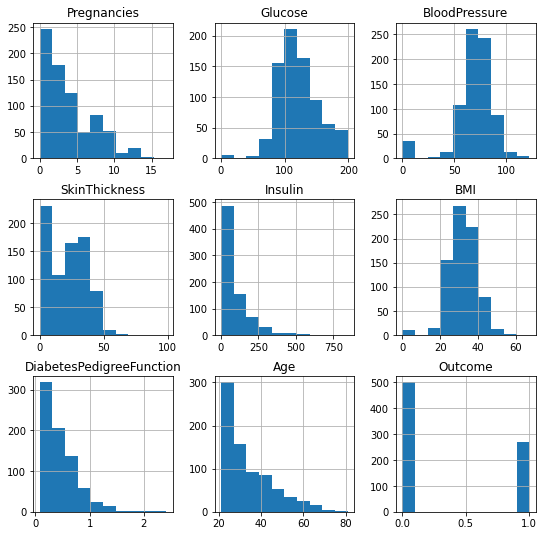

In [3]:
# ANALYSIS OF THE COLUMNS

%matplotlib inline
import pandas as pd


diabetes = pd.read_csv('../datasets/diabetes.csv')
# Simple graphs of the different features(columns)
diabetes.hist(figsize=(9, 9))



Grouped by outcome


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

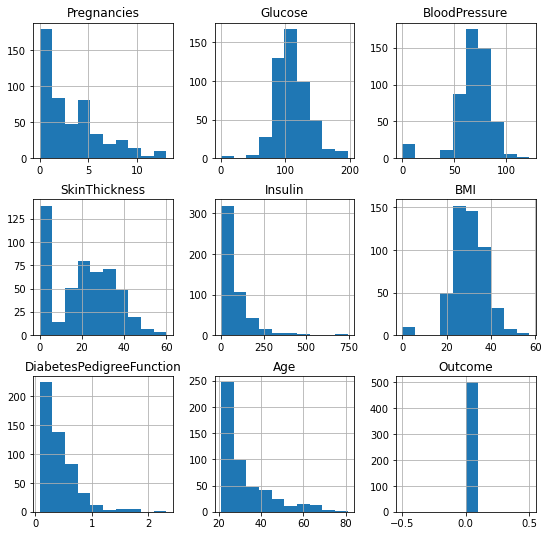

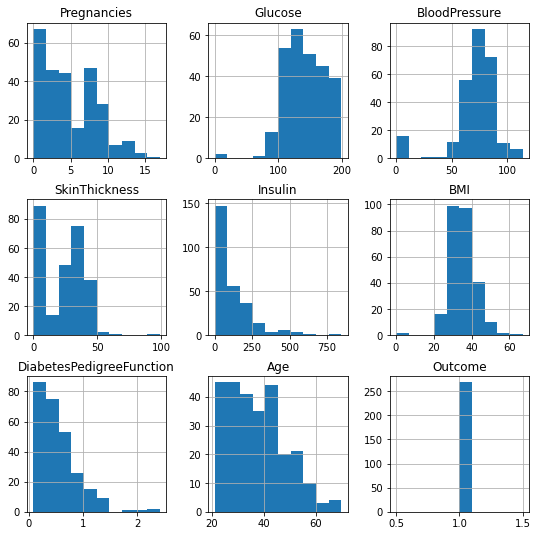

In [4]:
# ANALYSIS OF THE COLUMNS BY OUTCOME

%matplotlib inline
import pandas as pd

diabetes = pd.read_csv('../datasets/diabetes.csv')
print("Grouped by outcome")
# Simple graphs of the different features(columns) according to the outcome
diabetes.groupby('Outcome').hist(figsize=(9, 9))



Grouped by outcome


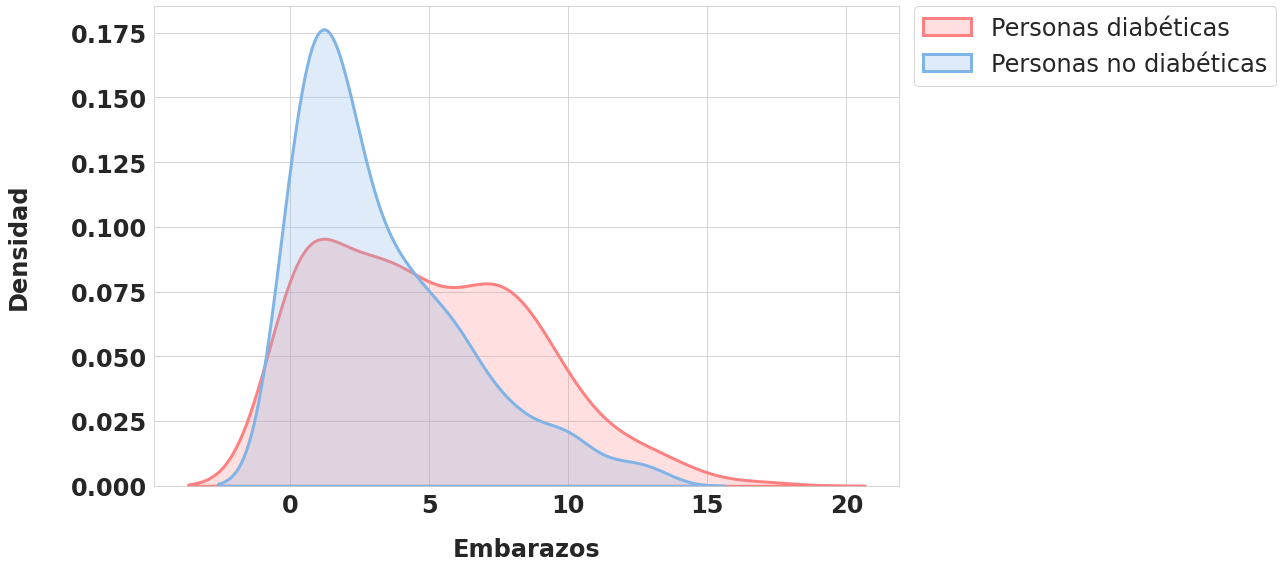

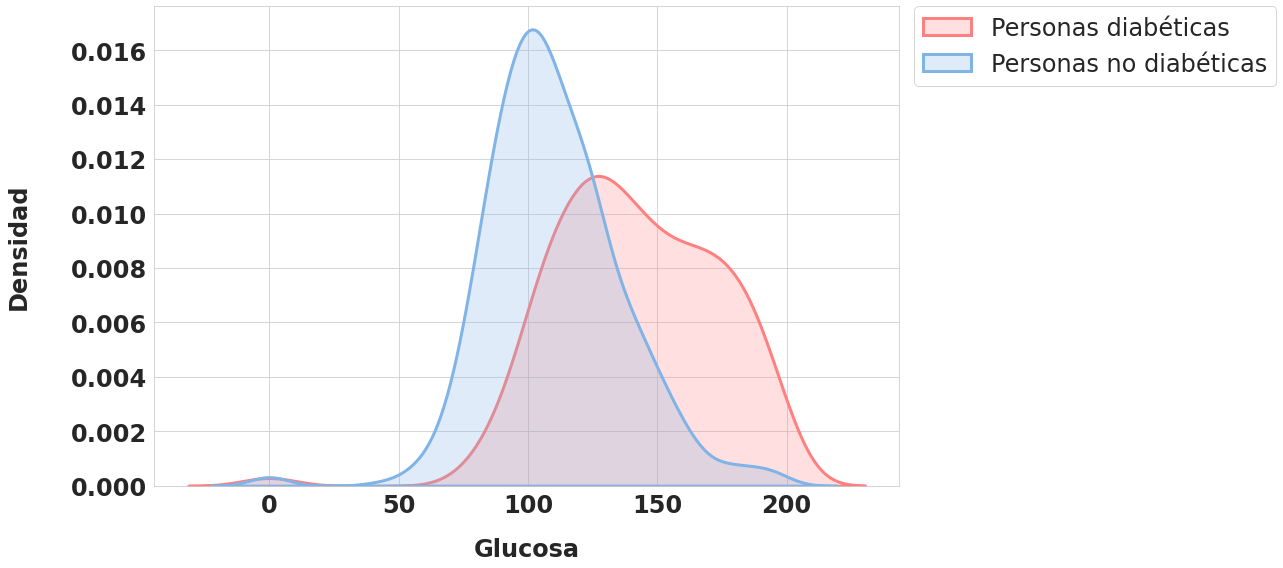

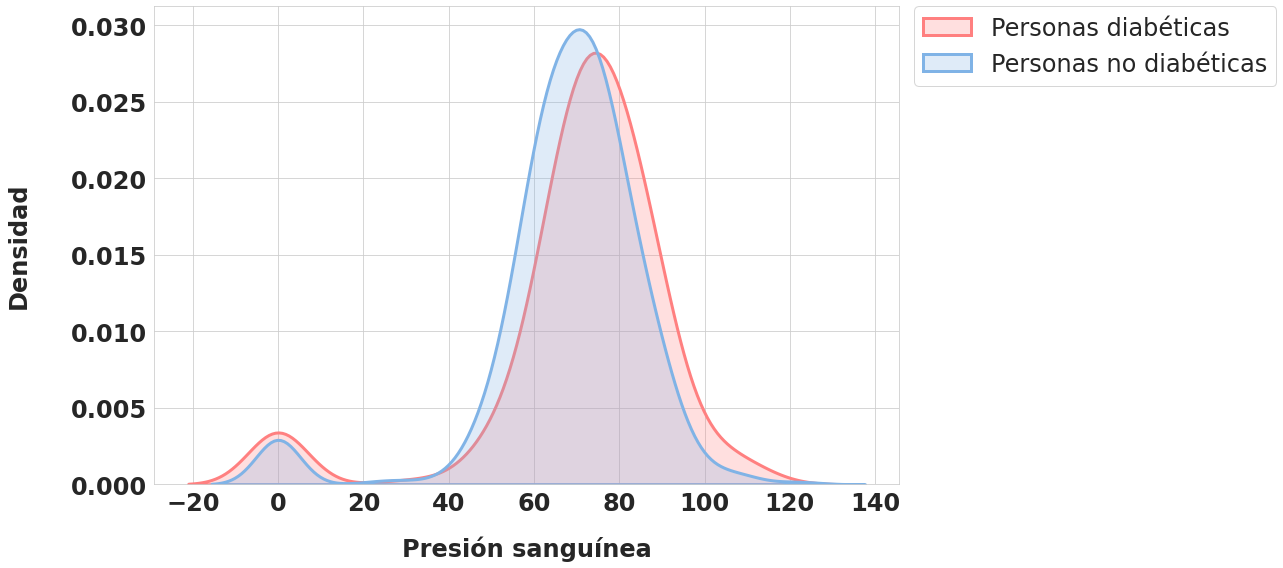

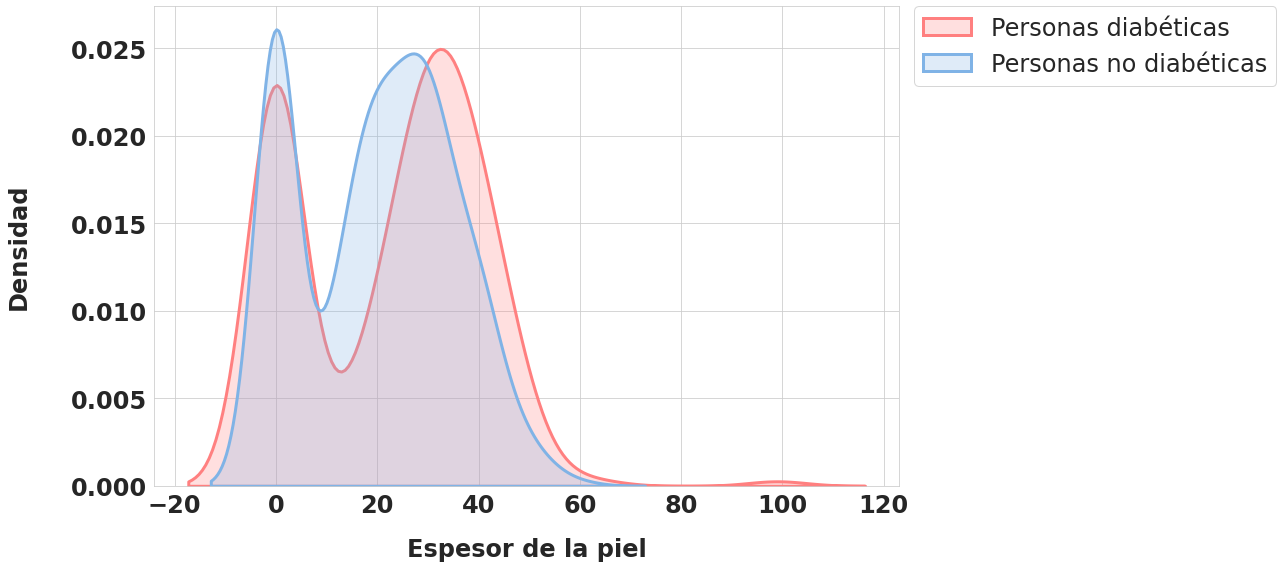

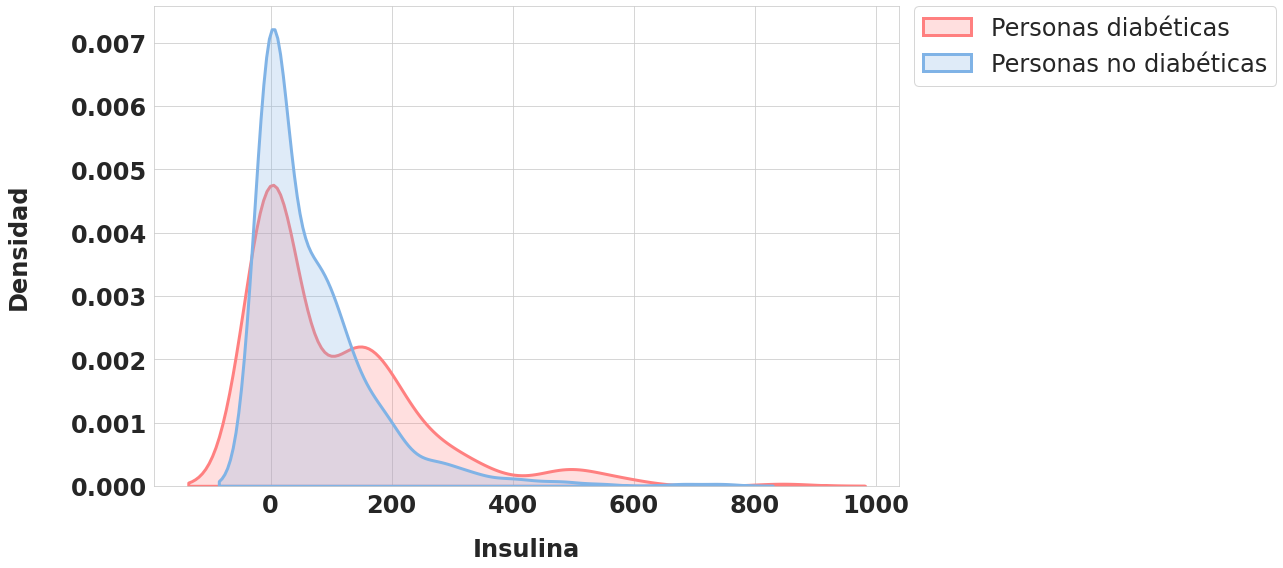

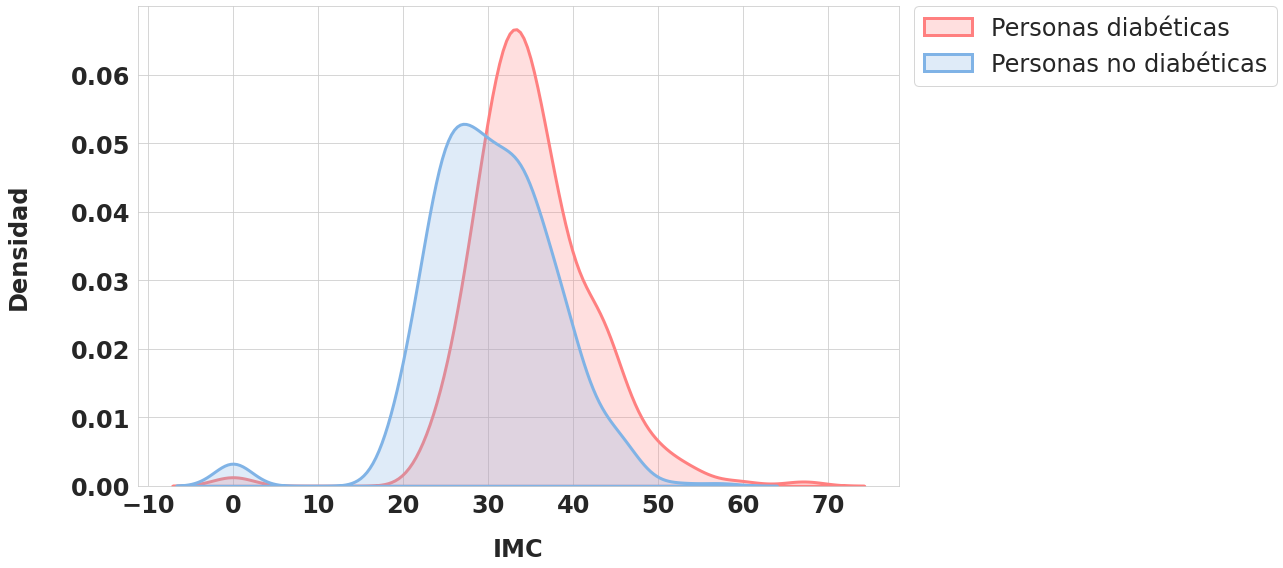

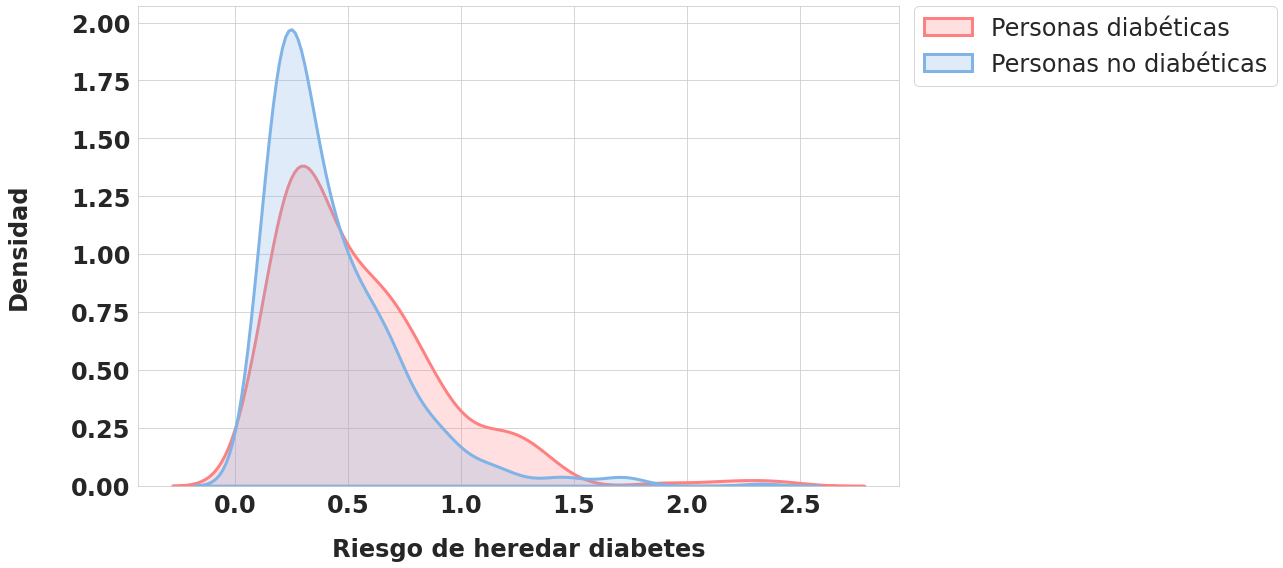

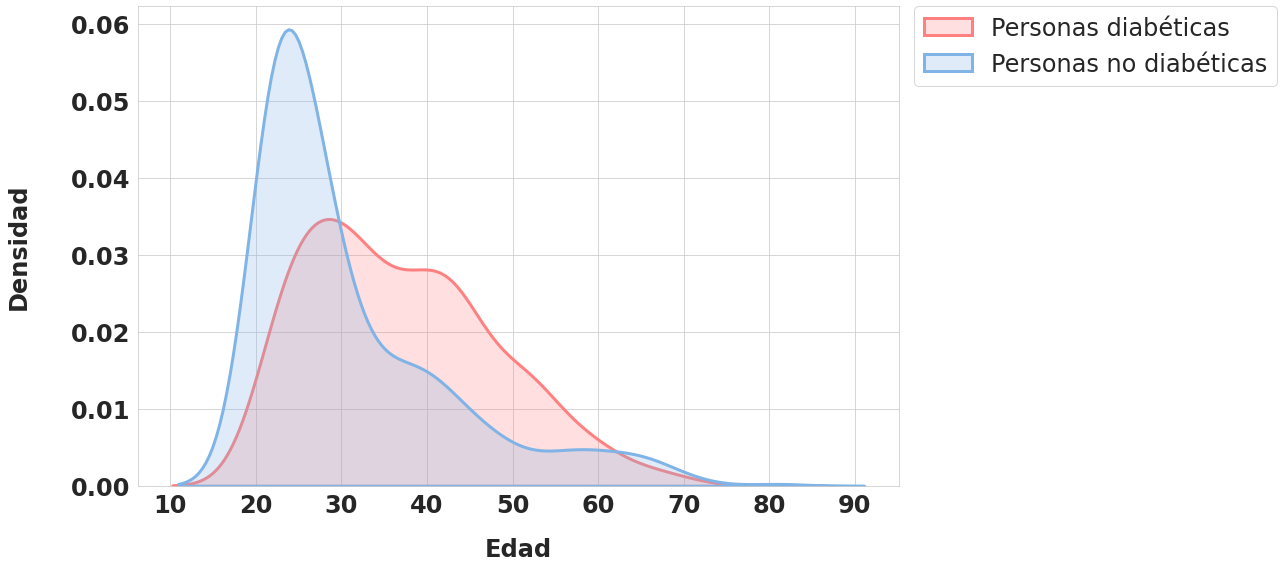

In [2]:
# ADVANCED ANALYSIS OF THE COLUMNS

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode


diabetes = pd.read_csv('../datasets/diabetes.csv')
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features_translated = ['Embarazos', 'Glucosa', 'Presión sanguínea', 'Espesor de la piel',
                       'Insulina', 'IMC', 'Riesgo de heredar diabetes', 'Edad']


# seaborn KDEs (Kernel Density Estimate)
colors = [(0.5, 0.7, 0.9), (1, 0.5, 0.5)]
sns.set_palette(sns.color_palette(colors))

for index in range(len(features)):
    # Graph per feature
    plt.rcParams.update({
        "figure.facecolor": (1.0, 1.0, 1.0),
        "savefig.facecolor": (1.0, 1.0, 1.0)
    })

    plt.figure(figsize=(18, 8))
    sns.set_style("whitegrid")

    sns.kdeplot(data=diabetes,x=features[index], hue='Outcome', common_norm=False,
                fill=True, linewidth=3)

    plt.legend(labels=["Personas diabéticas", "Personas no diabéticas"], fontsize =24,
               bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    plt.xlabel(features_translated[index], fontsize = 24, weight='bold', labelpad=20)
    plt.ylabel("Densidad", fontsize = 24, weight='bold', labelpad=40)

    plt.xticks(size=24, weight='bold')
    plt.yticks(size=24, weight='bold')

    plt.tight_layout()
    unaccented_string = unidecode.unidecode(features_translated[index]).replace(' ', '_')
    plt.savefig('../latex/tfgetsinf/recursos/exploracion_datos/' + unaccented_string.casefold() + '.png')



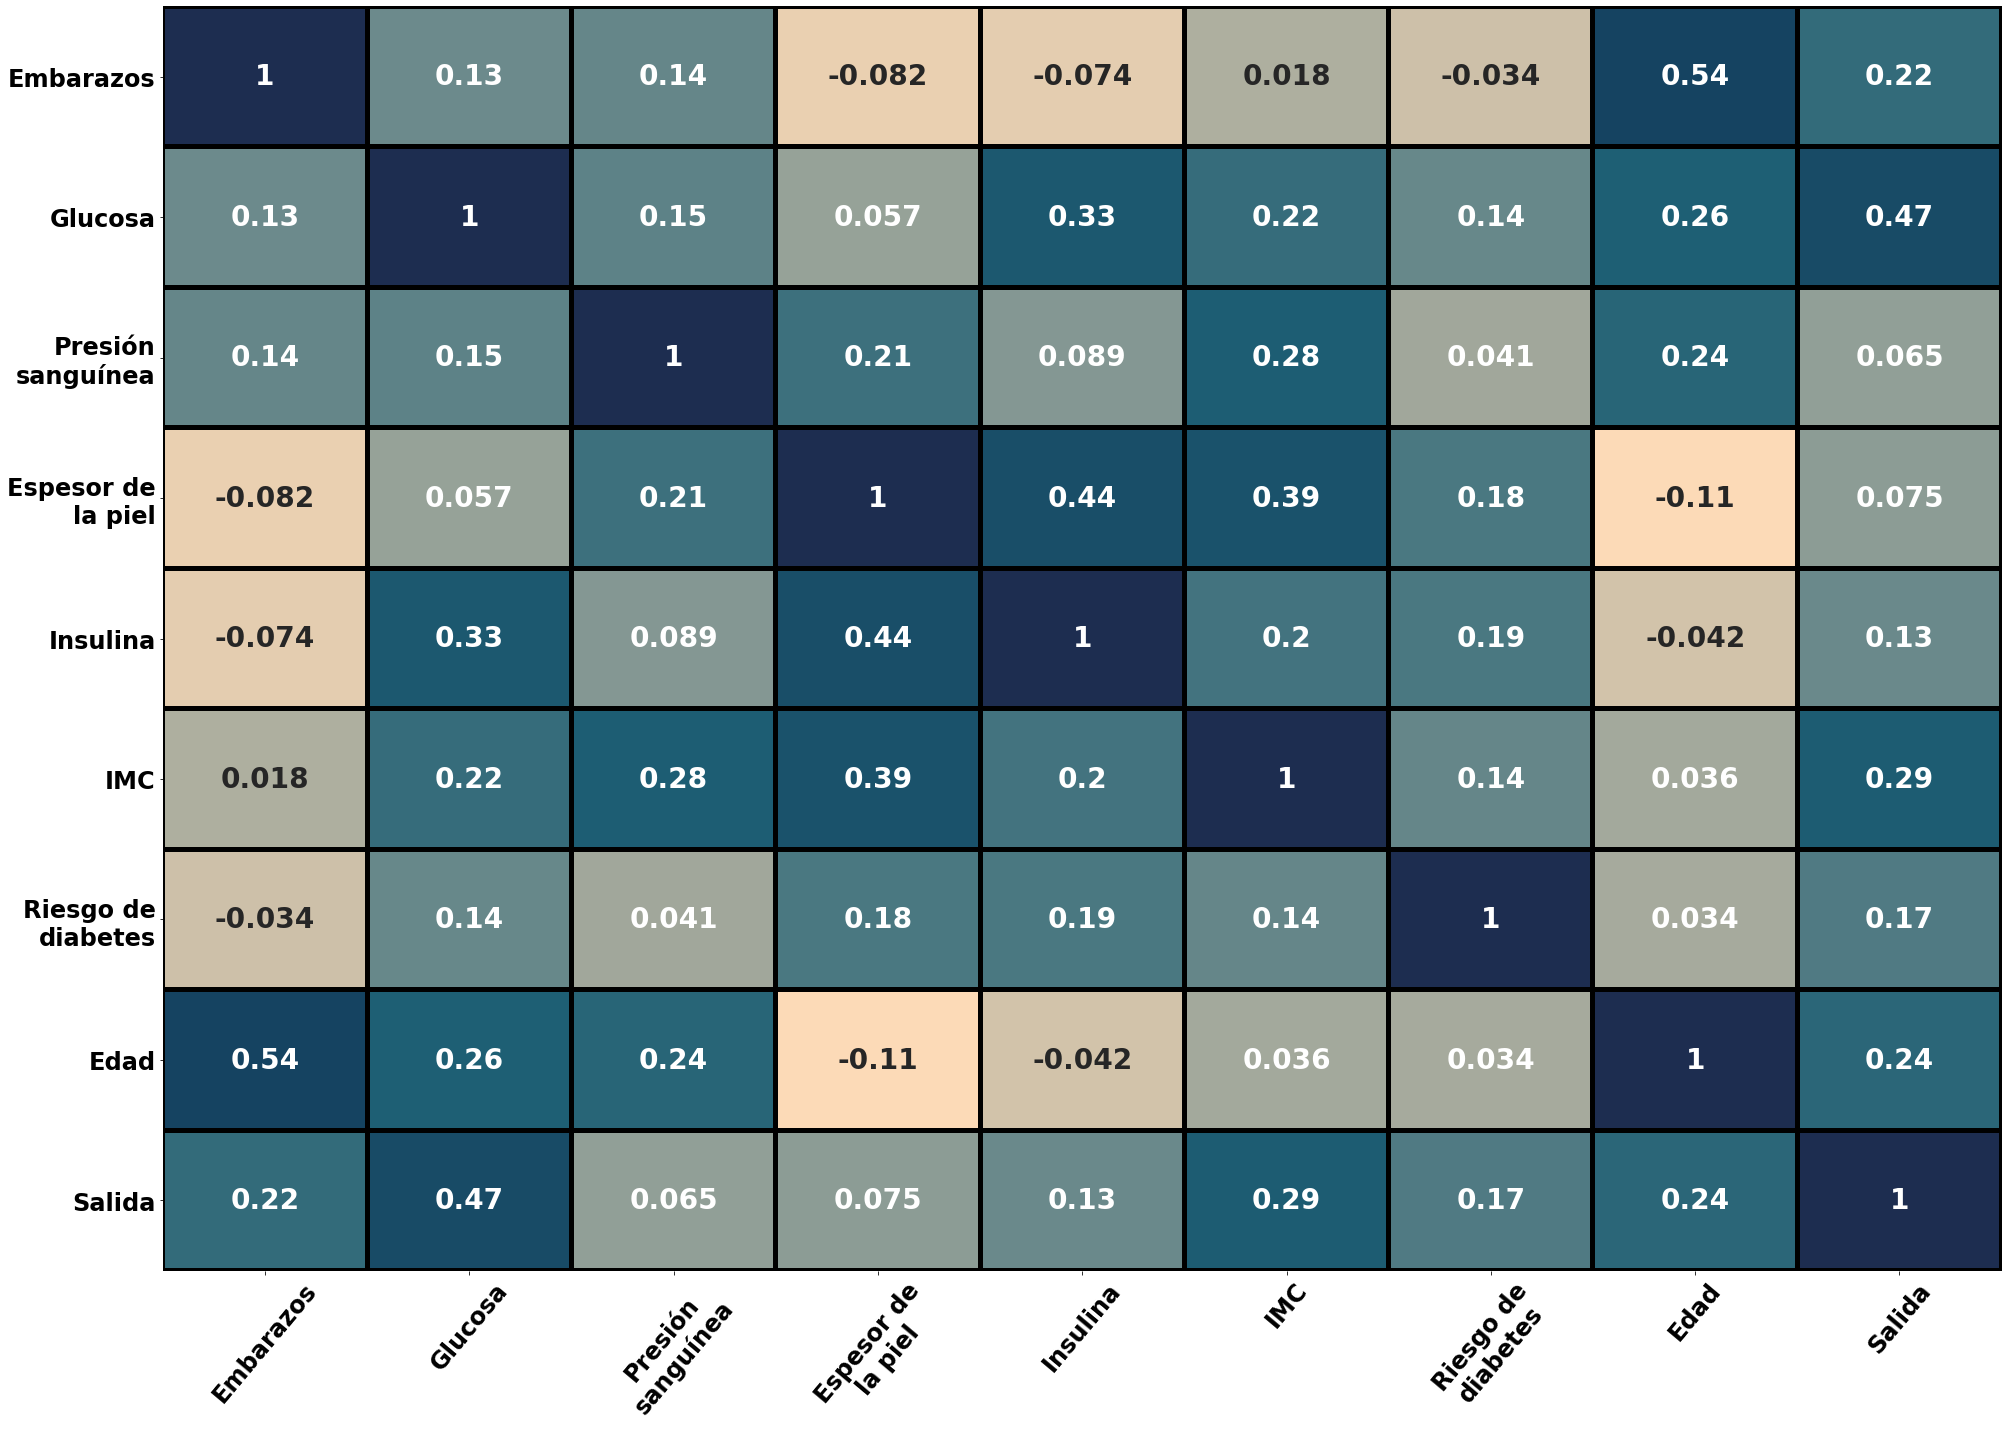

In [5]:
# FEATURE CORRELATION

%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


diabetes = pd.read_csv('../datasets/diabetes.csv')
features_translated = ['Embarazos', 'Glucosa', 'Presión\nsanguínea', 'Espesor de\nla piel',
                       'Insulina', 'IMC', 'Riesgo de\ndiabetes', 'Edad', 'Salida']


# Correlation heat map
corr=diabetes.corr()

color_list = ["#FCDAB7", "#1E5F74", "#133B5C", "#1D2D50"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", color_list)

textprops = {"fontsize":28, 'weight':'bold'}

plt.rcParams.update({
    "figure.facecolor": (1.0, 1.0, 1.0),
    "savefig.facecolor": (1.0, 1.0, 1.0)
})

plt.figure(figsize=(28, 20))
heatmap = sns.heatmap(corr, linewidths=4, annot=True, annot_kws=textprops, cmap=cmap, cbar=False, linecolor="black")

heatmap.set_xticklabels(features_translated, rotation=50)
heatmap.set_yticklabels(features_translated)

plt.xticks(size=24, weight='bold')
plt.yticks(size=24, weight='bold')

plt.tight_layout()
plt.savefig('../latex/tfgetsinf/recursos/exploracion_datos/correlacion.png')

